In [1]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import numpy as np
from numpy import transpose
import numpy.random as nu
from random import *
import math 
import time as t
from sympy import symbols, solve
from scipy.optimize import fsolve, root
from numpy.polynomial import polynomial as P

from scipy.optimize import minimize, Bounds, LinearConstraint
from scipy.optimize import fmin_slsqp

plt.rc('text',usetex=True)
plt.rc('font',family='serif')

In [34]:
def prod():
    r1,r2,r3=-1,-1,-1
    while r1<0 or r2<0 or r3<0:
        r1=normalvariate(1/3,0.2)
        r2=normalvariate(1/3,0.2)
        r3=normalvariate(1/3,0.2)
    return [1/r1,1/r2,1/r3]

def prodm():
    o1=prod()
    o2=prod()
    o3=prod()
    oi=np.linalg.inv([o1,o2,o3])
    while oi[0][0]+oi[1][0]+oi[2][0]<0 or oi[0][1]+oi[1][1]+oi[2][1]<0 or oi[0][2]+oi[1][2]+oi[2][2]<0:
        oi=np.linalg.inv([o1,o2,o3])
        o1=prod()
        o2=prod()
        o3=prod()
    
    return [o1,o2,o3]        

# Probability and odds for the fair case

p=np.array([0.2,0.6,0.2])
o=np.array([[12/7,4/7,6/7],
         [5/7,10/7,5/7],
         [6/7,4/7,12/7]])

#odds for a superfair case

sup_o=np.array([[2,2/3,1],
         [5/6,5/3,5/6],
         [1,2/3,2]])

#odds for a subfair case

sub_o=np.array([[3/2,1/2,3/4],
         [5/8,5/4,5/8],
         [3/4,1/2,3/2]])

#random odds
ro=np.array(prodm())
ro=ro*normalvariate(np.sum(np.linalg.inv(ro)),0.2)


#Standart deviation of X for a distribution of probability p


def dev(X,p):
    return(np.sqrt(np.sum(X**2*p)-np.sum(X*p)**2))


#gain W 

def sgain(o,b,x):     #ln(sum(o*b))=W
    return np.log(np.sum(o[x]*b))
            
def J(a,o,p,b):
    W=np.array([sgain(o,b,0),sgain(o,b,1),sgain(o,b,2)])
    dev1=dev(W,p)
    
    return a*np.sum(W*p)-(1-a)*dev1-a*np.sum(b)



#Plot of the standart deviation for the mean
#o is the odds 
#p is the probability
#n is the number of points in the plot
#l is a boolean representing whether or not we show the linear approximation, optional

def figure_3(o,p,n,l=False,alphai=0,alphas=0.8):
    Wt=np.array([])
    devt=np.array([])
    
    for i in range(n):
        #by changing the min and max in the uniform function we can choose to simulate only one part of the plot
        
        bx=alg(uniform(alphai,alphas),p,o,300)      
        
        #with this one we can show a larger and more uniform plot, quicker
        #bx=unibets(alphai,alphas)
        
        W1=np.array([sgain(o,bx,0),sgain(o,bx,1),sgain(o,bx,2)])
        dev1=dev(W1,p)
        
        mW1=np.sum(W1*p)
        
        Wt=np.append(Wt,mW1)
        devt=np.append(devt,dev1)
    
    plt.plot(Wt,devt,'.',markersize=3)    
    plt.xlabel(r'$\langle W \rangle$',fontsize=18)
    plt.ylabel(r'$\sigma_W$',fontsize=18)
    plt.title('(b)')
    
    if l :
        oi=np.linalg.inv(o)
        q=np.array([cq(oi,p,0),cq(oi,p,1),cq(oi,p,2)])     #
        sq=dev(q,p)
        mq=np.sum(oi)
        r=q*p/mq
        
        v=-np.log(np.sum(oi))       
        x=np.linspace(min(Wt),max(Wt),100)
        w=np.abs(x-v)/sq*mq
        plt.plot(x,w)
        print(v)
        
    plt.savefig('cloud2.pdf')
    
#sum of a column
def cq(o,p,c):
    return (o[0][c]+o[1][c]+o[2][c])/p[c]

#useful in the optimisation algorithm

def varia(b):
    b2=[-1,0,0]
    while b2[0]<0 or b2[1]<0 or b2[2]<0:
        b2=np.array([])
        for i in range(2):
            b2=np.append(b2,normalvariate(b[i],0.1))
        b2=np.append(b2,1-np.sum(b2))
    return(b2)

#simulated annealing algorithm

def alg(a,p,o,temp):
    
    best=[1/3,1/3,1/3]
    best_eval = J(a,o,p,best)
    curr, curr_eval = best, best_eval
    for i in range(100):
        candidate= varia(curr)
        candidate_eval = J(a,o,p,candidate)
        
        if candidate_eval > best_eval:
            best,best_eval=candidate,candidate_eval
        diff=candidate_eval-curr_eval
        t=temp/float(i+1)
        metropolis = np.exp(-diff/t)
        
        if diff<0 or nu.uniform()<metropolis:
            curr,curr_eval=candidate,candidate_eval
            
        
    return best    

-0.0


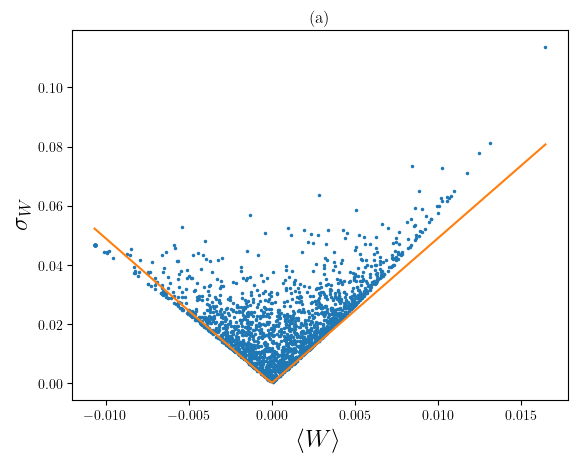

In [33]:
#plot near the null strategy
figure_3(o,p,2000,True)

0.1541506798272586


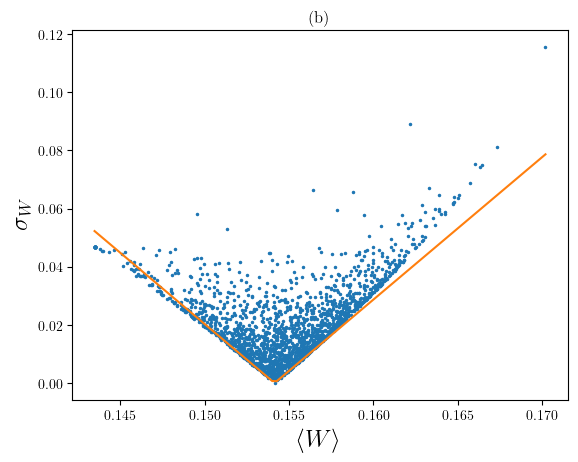

In [35]:
figure_3(sup_o,p,2000,True)

In [15]:
print(o)

[[1.71428571 0.57142857 0.85714286]
 [0.71428571 1.42857143 0.71428571]
 [0.85714286 0.57142857 1.71428571]]


In [6]:
Wt

array([-0.00784482, -0.00320158, -0.00243655, -0.0016251 ,  0.0016641 ,
        0.00189608])